# This notebook can be used to check on the data after you have used the gui. If, for example, you want to see the comments entered into the database using the gui, you could do that here. 

In [1]:
import datajoint as dj
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from table_classes import Documents, ConvertedDocuments, BoxedImages 

[2023-03-28 11:49:12,821][INFO]: Connecting root@localhost:3306
[2023-03-28 11:49:12,843][INFO]: Connected root@localhost:3306


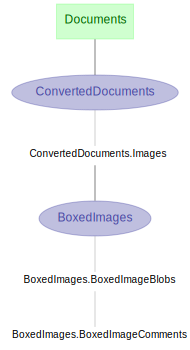

In [2]:
schema = dj.Schema("exxonmobile")
dj.Diagram(schema)

In [3]:
Documents()

document_id unique id for document,datetime time document was imported into table,file_name document filename
0,2023-03-28 11:46:40.729253,7b12da4f-7664-433c-9a34-4306c35f1aab_removed.pdf


In [4]:
ConvertedDocuments.Images()

document_id unique id for document,image_number,image
0,1,=BLOB=
0,2,=BLOB=
0,3,=BLOB=
0,4,=BLOB=
0,5,=BLOB=


In [5]:
image1 = (ConvertedDocuments.Images & 'image_number=1').fetch1('image')

In [6]:

boxed_image = Image.open(io.BytesIO(image1))

# # Display the image using Image.show() method (opens the image in the default image viewer)
boxed_image.show()

# Or display the image in a Jupyter notebook with %matplotlib inline

# plt.imshow(boxed_image)
# plt.axis('off')
# plt.show()

In [10]:
BoxedImages.BoxedImageBlobs()

document_id unique id for document,image_number,box_number,boxed_image
0,1,1,=BLOB=
0,1,2,=BLOB=
0,1,3,=BLOB=
0,1,4,=BLOB=
0,1,5,=BLOB=
0,1,6,=BLOB=
0,1,7,=BLOB=
0,1,8,=BLOB=
0,1,9,=BLOB=
0,1,10,=BLOB=


In [13]:
image2 = (BoxedImages.BoxedImageBlobs & 'image_number=4' & 'box_number=5').fetch1('boxed_image')

In [14]:
# Convert the boxed_image_blob back to an image
boxed_image = Image.open(io.BytesIO(image2))

# # Display the image using Image.show() method (opens the image in the default image viewer)
boxed_image.show()

# Or display the image in a Jupyter notebook with %matplotlib inline
# plt.imshow(boxed_image)
# plt.axis('off')
# plt.show()

In [15]:
BoxedImages.BoxedImageComments()

document_id unique id for document,image_number,box_number,comment_timestamp unique timestamp for each comment,comment
0,1,3,2023-03-16 15:37:27,null
0,2,3,2023-03-17 10:06:28,"5,290"
0,4,5,2023-03-28 10:17:42,em


In [19]:
# Documents.drop()